In [62]:
from os import chdir
chdir("C:/Users/idris/Desktop/ENSAE/S1_3A/Statistique_Bayesienne/BayesianStats/")
import pandas as pd
import numpy as np
import matplotlib.pylab as plt
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler
from src.model.mbc_model import MBClustering
import statsmodels.api as sm

In [63]:
sns.set_theme()

In [64]:
data_ale = pd.read_csv(f"./data/mcs_ds_edited_iter_shuffled.csv")
data_ale = data_ale[["ale", "anchor_ratio", "trans_range", "node_density", "iterations"]].reset_index()

In [65]:
data_ale.head()

,index,ale,anchor_ratio,trans_range,node_density,iterations
0,0,0.773546,30,15,200,40
1,1,0.911941,15,15,100,70
2,2,0.814867,30,15,100,50
3,3,1.435332,15,20,100,20
4,4,1.265909,30,15,100,40


# Linear Regression

c:\Users\idris\anaconda3\lib\site-packages\statsmodels\tsa\tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


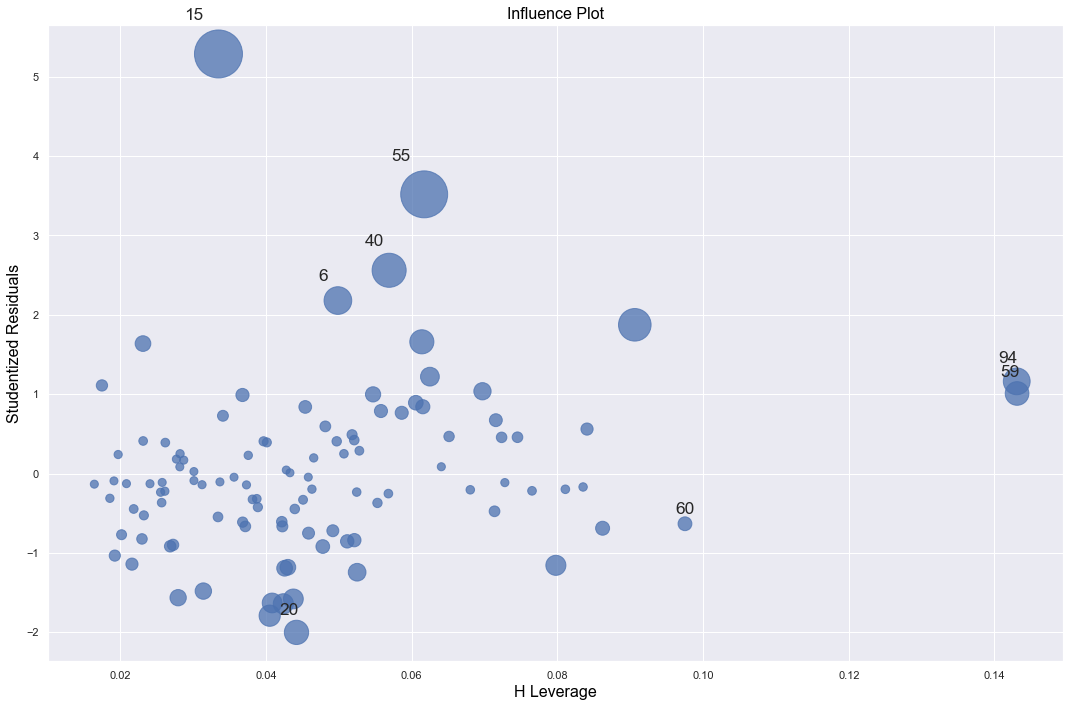

In [66]:
ale_model = sm.OLS(data_ale.iloc[:, [1]], sm.add_constant(data_ale.iloc[:, 2:])).fit()
fig, axe =  plt.subplots(1, 1, figsize=(15, 10))
fig = sm.graphics.influence_plot(ale_model, criterion="cooks", ax=axe)
fig.tight_layout(pad=1.0)

# Clustering Analysis

In [67]:
list_clustering_data = []
for K in range(1, 10):
    init_Clusters = MBClustering(data_ale, K).initZ()
    MBC_Clusters, BIC_val = MBClustering(data_ale, K).EM_algo(100)
    list_clustering_data.append([K, init_Clusters, MBC_Clusters, BIC_val])
list_clustering_data = np.array(list_clustering_data)

c:\Users\idris\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:881: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
c:\Users\idris\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:881: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
c:\Users\idris\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:881: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\idris\AppData\Local\Temp/ipykernel_15680/1809954874.py:6: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequen

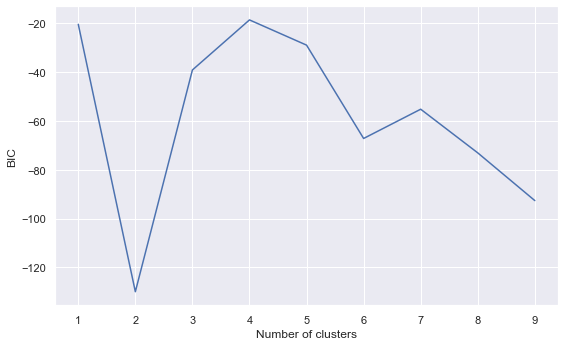

In [68]:
fig, axe =  plt.subplots(1, 1, figsize=(9, 5.5))
axe.plot(list_clustering_data[:, [0]], list_clustering_data[:, [3]])
axe.set_ylabel("BIC")
axe.set_xlabel("Number of clusters")
plt.savefig("./figs/bic_ale.pgf", format='pgf')
plt.show()

In [69]:
list_clustering_data[:, [3]]

array([[-20.487189383818386],
       [-129.93778781291297],
       [-39.17850471921615],
       [-18.69100482814285],
       [-29.013699928606535],
       [-67.21547772598755],
       [-55.24113709967077],
       [-73.11025625643683],
       [-92.64375044558653]], dtype=object)

In [70]:
K = 4

In [71]:
data_ale.insert(1, "Kmeans_clusters", [1+list(list_clustering_data[K-1][1][n]).index(1) for n in range(list_clustering_data[K-1][1].shape[0])])

In [72]:
data_ale.insert(1, "clusters", [1+list(list_clustering_data[K-1][2][n]).index(1) for n in range(list_clustering_data[K-1][2].shape[0])])

In [77]:
data_ale[data_ale.clusters==1].reset_index(drop=True)

,index,clusters,Kmeans_clusters,ale,anchor_ratio,trans_range,node_density,iterations
0,0,1,1,0.773546,30,15,200,40
1,1,1,4,0.911941,15,15,100,70
2,2,1,4,0.814867,30,15,100,50
3,3,1,1,1.435332,15,20,100,20
4,4,1,1,1.265909,30,15,100,40
...,...,...,...,...,...,...,...,...
95,102,1,1,1.287472,18,23,100,20
96,103,1,2,0.899102,14,17,200,60
97,104,1,1,1.171140,15,20,100,50
98,105,1,1,1.234493,20,20,100,40


In [74]:
data_ale[data_ale.clusters==2].reset_index(drop=True)

,index,clusters,Kmeans_clusters,ale,anchor_ratio,trans_range,node_density,iterations


In [78]:
data_ale[data_ale.clusters==3].reset_index(drop=True)

,index,clusters,Kmeans_clusters,ale,anchor_ratio,trans_range,node_density,iterations


In [79]:
data_ale[data_ale.clusters==4].reset_index(drop=True)

,index,clusters,Kmeans_clusters,ale,anchor_ratio,trans_range,node_density,iterations
0,6,4,3,1.912674,18,23,100,14
1,15,4,3,2.568407,22,18,100,18
2,36,4,2,1.972683,15,15,100,20
3,40,4,3,2.178482,15,16,100,16
4,55,4,3,2.263947,28,15,100,16
5,70,4,2,1.720088,30,15,100,20
6,87,4,2,1.749734,22,18,100,30


In [ ]:
# IKonkobo_SMethafe